Question 3: How do customer behaviors vary across different segments?
Objective: Analyze patterns in product usage, transaction history, and digital
engagement among various customer segments.
Expected Outcome: Use insights to recommend targeted marketing approaches
for each segment.

In [726]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import os
os.chdir("..")  
os.chdir("Data DSA3101")

In [728]:
customers = pd.read_csv("customer_data_with_labels_only.csv")
transactions = pd.read_csv("transactions_summary.csv")
digital_usage = pd.read_csv("digital_usage.csv")

Merging tables and doing data cleaning.

In [731]:
# Merge tables
customer_data = customers.merge(transactions, on = "customer_id", how = "left")
customer_data = customer_data.merge(digital_usage, on = "customer_id", how = "left")
# Transform 'yes'/'no' into 1/0 for the columns has_mobile_app and has_web_account
customer_data['has_mobile_app'] = customer_data['has_mobile_app'].map({'Yes': 1, 'No': 0})
customer_data['has_web_account'] = customer_data['has_web_account'].map({'Yes': 1, 'No': 0})

The following codes are used to explore the data and find some background information about the 3 clusters before plotting graphs.

In [734]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9429 entries, 0 to 9428
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_id                      9429 non-null   int64  
 1   age                              9429 non-null   int64  
 2   job                              9429 non-null   object 
 3   marital                          9429 non-null   object 
 4   education                        9429 non-null   object 
 5   credit_default                   9429 non-null   int64  
 6   region                           9429 non-null   object 
 7   income                           9429 non-null   int64  
 8   created_at                       9429 non-null   object 
 9   credit_card                      9429 non-null   int64  
 10  personal_loan                    9429 non-null   int64  
 11  mortgage                         9429 non-null   int64  
 12  savings_account     

In [736]:
# Group by 'Cluster' and calculate summary statistics for numerical columns
numerical_columns = ['age', 'income']
numerical_summary = customer_data.groupby('cluster')[numerical_columns].describe()

# Group by 'Cluster' and calculate the mode (most common value) for categorical columns
categorical_columns = ['marital', 'education', 'region']
categorical_summary = customer_data.groupby('cluster')[categorical_columns].agg(lambda x: x.mode()[0])

# Display numerical summary
print("Numerical Summary (Age and Income):")
print(numerical_summary)

# Display categorical summary
print("\nCategorical Summary (Marital, Education, and Region):")
print(categorical_summary)

Numerical Summary (Age and Income):
            age                                                      income  \
          count       mean        std   min   25%   50%   75%   max   count   
cluster                                                                       
0        1260.0  51.757143  22.629553  21.0  26.0  54.0  71.0  99.0  1260.0   
1        1796.0  45.124722  12.046846  21.0  37.0  44.0  53.0  99.0  1796.0   
2        6373.0  45.546838  11.700994  21.0  37.0  45.0  53.0  99.0  6373.0   

                                                                              
                mean          std     min      25%     50%      75%      max  
cluster                                                                       
0        1255.966667   948.001771     0.0   460.50   931.0  2064.25   7722.0  
1        6293.330735  2175.742873  1519.0  4826.75  6273.0  8120.00  14272.0  
2        3085.922015  1058.142119    37.0  2386.00  3153.0  3780.00   9967.0  

Categorical Su

We can see that cluster 0 has the highest average age, cluster 1 has the highest average income and the highest education level and cluster 2 is mostly in between cluster 0 and cluster 1.

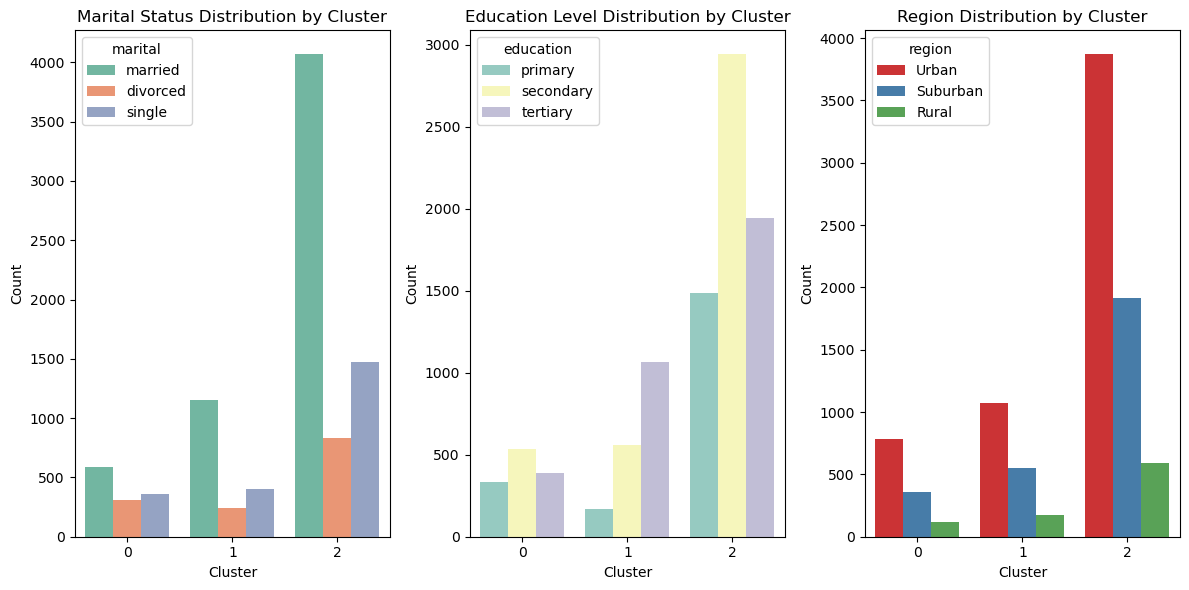

/var/folders/v1/4wqkj2hj45z1lw3v85kc4z5w0000gn/T/ipykernel_56050/113811976.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='age', data=customer_data, palette='Set1')
/var/folders/v1/4wqkj2hj45z1lw3v85kc4z5w0000gn/T/ipykernel_56050/113811976.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='income', data=customer_data, palette='Set2')


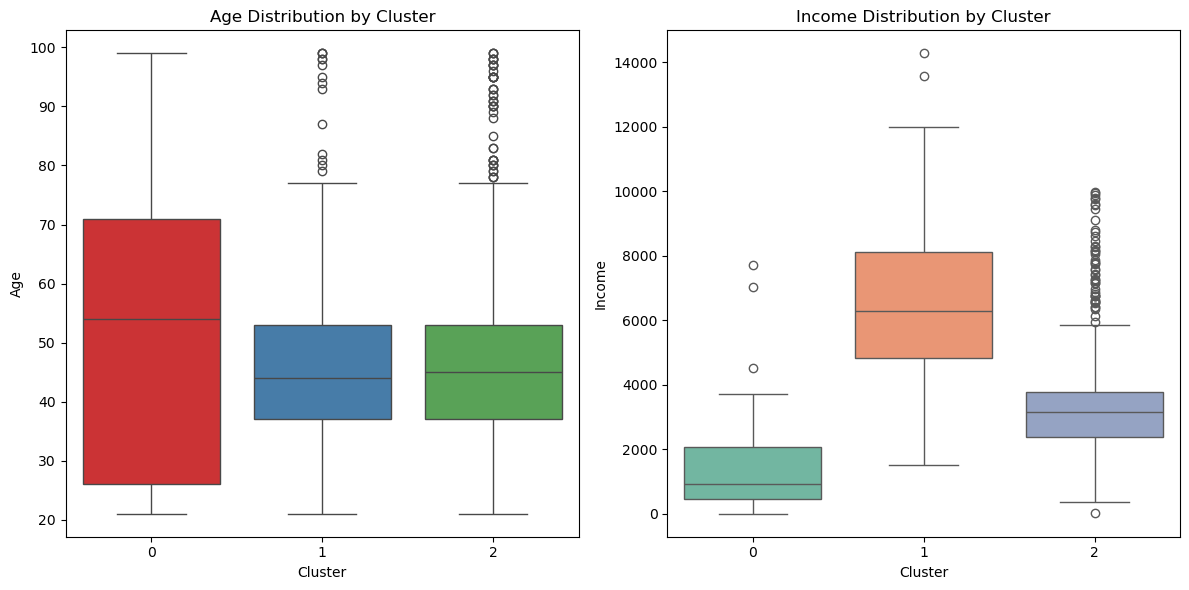

In [739]:
# Plot categorical variables (Marital, Education, Region) across clusters, with clusters on the x-axis
plt.figure(figsize=(12, 6))

# Marital Status Distribution
plt.subplot(1, 3, 1)
sns.countplot(x='cluster', hue='marital', data=customer_data, palette='Set2')
plt.title('Marital Status Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')

# Education Level Distribution
plt.subplot(1, 3, 2)
sns.countplot(x='cluster', hue='education', data=customer_data, palette='Set3')
plt.title('Education Level Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')

# Region Distribution
plt.subplot(1, 3, 3)
sns.countplot(x='cluster', hue='region', data=customer_data, palette='Set1')
plt.title('Region Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Plot boxplots for Age and Income by Cluster
plt.figure(figsize=(12, 6))

# Age Distribution
plt.subplot(1, 2, 1)
sns.boxplot(x='cluster', y='age', data=customer_data, palette='Set1')
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')

# Income Distribution
plt.subplot(1, 2, 2)
sns.boxplot(x='cluster', y='income', data=customer_data, palette='Set2')
plt.title('Income Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')

plt.tight_layout()
plt.show()

Plot 0: Bar graph to show how many customers are in each cluster

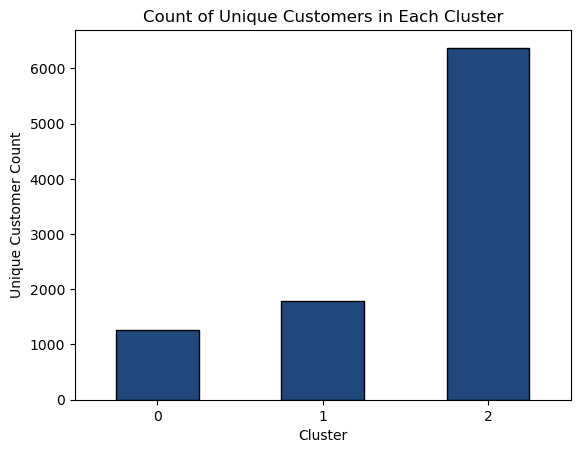

In [742]:
cluster_counts = customer_data.groupby("cluster")["customer_id"].nunique()

cluster_counts.plot(kind = "bar", color = "#1F497D", edgecolor = "black")

plt.xlabel("Cluster")
plt.ylabel("Unique Customer Count")
plt.title("Count of Unique Customers in Each Cluster")
plt.xticks(rotation = 0)
plt.show()

__Plot 1: Bar graph of mean product usage across customer segments__

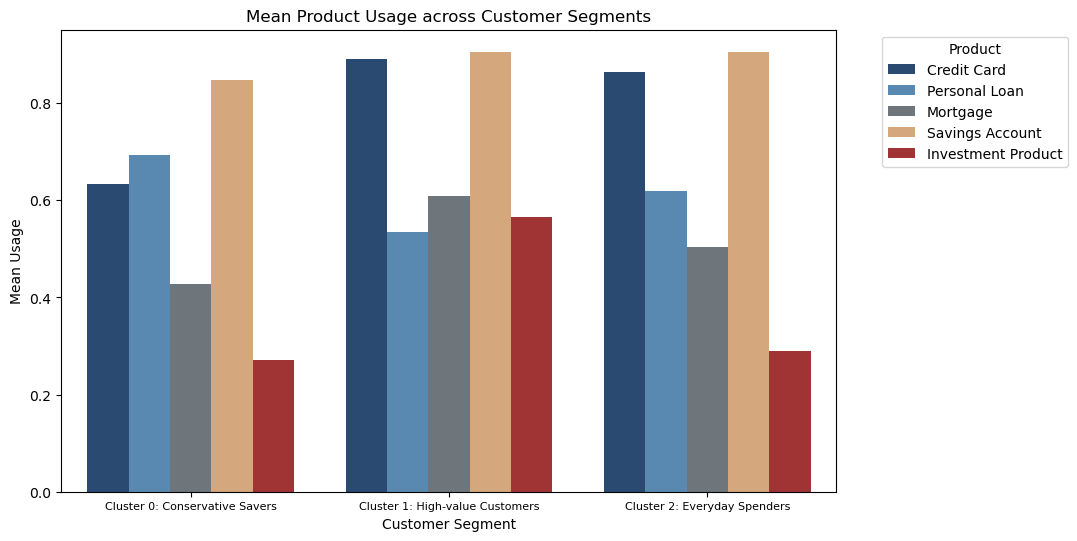

In [745]:
# Segment distribution
segment_distribution = customer_data['cluster'].value_counts()

# Define the product columns
product_columns = ['credit_card', 'personal_loan', 'mortgage', 'savings_account', 'investment_product']

# Calculate mean product usage by segment
product_usage_by_segment = customer_data.groupby('cluster')[product_columns].mean()

# Reset index to turn clusters into a column
product_usage_by_segment_reset = product_usage_by_segment.reset_index()

# Melt the DataFrame to long format for seaborn
df_melted = product_usage_by_segment_reset.melt(id_vars='cluster', 
                                                var_name='Product', 
                                                value_name='Mean Usage')

# Rename products in the DataFrame
rename_dict = {
    'credit_card': 'Credit Card',
    'personal_loan': 'Personal Loan',
    'mortgage': 'Mortgage',
    'savings_account': 'Savings Account',
    'investment_product': 'Investment Product'
}
df_melted['Product'] = df_melted['Product'].replace(rename_dict)

# Define custom names for clusters
cluster_names = {
    0: 'Cluster 0: Conservative Savers',
    1: 'Cluster 1: High-value Customers',
    2: 'Cluster 2: Everyday Spenders'
}

# Map the cluster numbers to meaningful names
df_melted['cluster'] = df_melted['cluster'].replace(cluster_names)

# Set custom palette
custom_palette = ["#1F497D", "#4B8BBE", "#6C757D", "#E2A76F", "#B22222"]
sns.set_palette(custom_palette)

# Plot grouped bar chart with clusters on x-axis
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='cluster', y='Mean Usage', hue='Product')

# Adjust labels and title
plt.xticks(ha='center', fontsize=8)  # Adjust rotation and position of x-axis labels
plt.ylabel('Mean Usage')
plt.xlabel('Customer Segment')
plt.title('Mean Product Usage across Customer Segments')

# Adjust legend
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

We can see that for cluster 0, customers mostly use savings account and the least used product is investment products. Cluster 1 has the highest mean usage in all products except personal loans. Cluster 2 has high mean usage in credit card and savings account.

__Plot 2: Line graph of peak month distribution across customer segments__

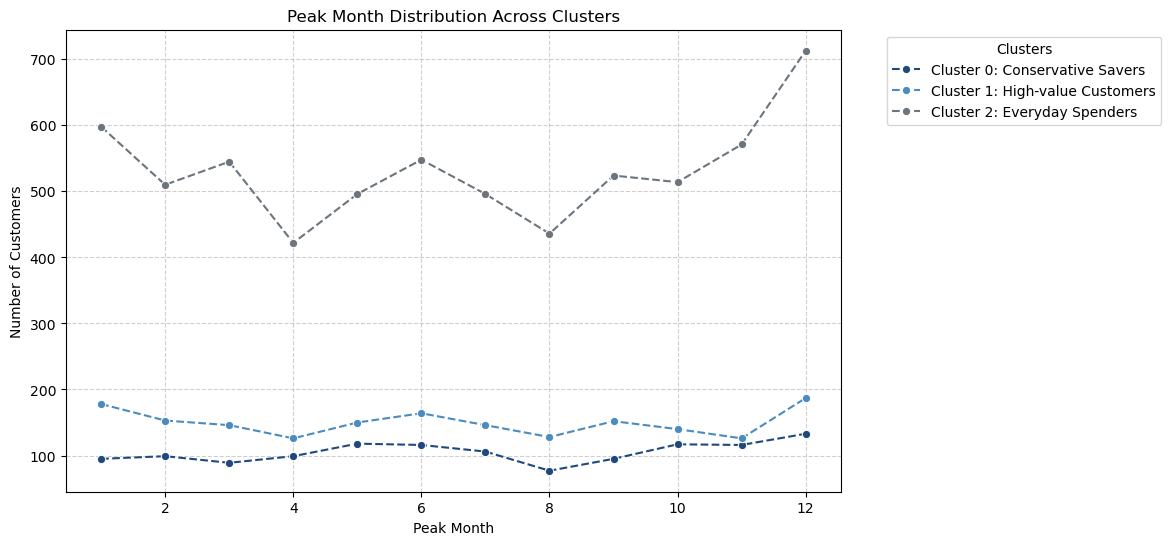

In [749]:
cluster_names = {
    0: 'Cluster 0: Conservative Savers',
    1: 'Cluster 1: High-value Customers',
    2: 'Cluster 2: Everyday Spenders'
}

peak_month_counts = customer_data.groupby(['cluster', 'peak_month']).size().reset_index(name='count')

# Map cluster numbers to names
peak_month_counts['cluster_name'] = peak_month_counts['cluster'].map(cluster_names)

# Set professional color palette
custom_palette = ["#1F497D", "#4B8BBE", "#6C757D"]
sns.set_palette(custom_palette)

# Plot line graph with cluster names
plt.figure(figsize = (10, 6))
sns.lineplot(data = peak_month_counts, x = 'peak_month', y = 'count', hue = 'cluster_name', marker = 'o', linestyle = "--")

# Adjust labels and title
plt.xlabel('Peak Month')
plt.ylabel('Number of Customers')
plt.title('Peak Month Distribution Across Clusters')

# Adjust legend
plt.legend(title = 'Clusters', bbox_to_anchor = (1.05, 1), loc = 'upper left')

# Add grid for better readability
plt.grid(True, linestyle = '--', alpha = 0.6)

plt.show()

We can see that for all 3 clusters, December is the peak month for most of the customers. This means that we can offer promotions for all 3 clusters in December to further increase customers' spendings and transaction frequency.

__Plot 3: Bar Graphs of Peak Month Spending & Peak Month Frequency across customer segments__

/var/folders/v1/4wqkj2hj45z1lw3v85kc4z5w0000gn/T/ipykernel_56050/2028246748.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = peak_month_data, x = 'cluster', y = 'peak_month_spending', palette = 'Blues')
/var/folders/v1/4wqkj2hj45z1lw3v85kc4z5w0000gn/T/ipykernel_56050/2028246748.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = peak_month_data, x = 'cluster', y = 'peak_month_frequency', palette = 'Reds')


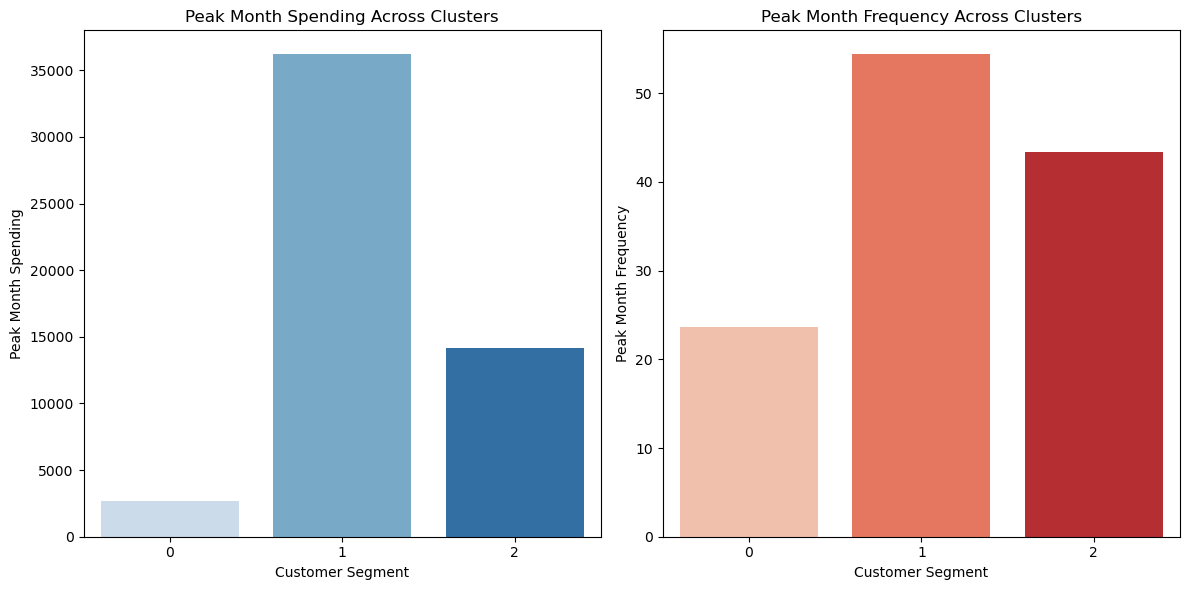

In [753]:
# Group data by customer segment and calculate the mean peak month spending and frequency
peak_month_data = customer_data.groupby('cluster')[['peak_month_spending', 'peak_month_frequency']].mean().reset_index()

# Plot bar graph for peak month spending and frequency
plt.figure(figsize = (12, 6))

# Plot peak month spending
plt.subplot(1, 2, 1)
sns.barplot(data = peak_month_data, x = 'cluster', y = 'peak_month_spending', palette = 'Blues')
plt.title('Peak Month Spending Across Clusters')
plt.ylabel('Peak Month Spending')
plt.xlabel('Customer Segment')

# Plot peak month frequency
plt.subplot(1, 2, 2)
sns.barplot(data = peak_month_data, x = 'cluster', y = 'peak_month_frequency', palette = 'Reds')
plt.title('Peak Month Frequency Across Clusters')
plt.ylabel('Peak Month Frequency')
plt.xlabel('Customer Segment')

plt.tight_layout()

For cluster 0, both the peak month spending and peak month frequency is low. For cluster 1, both the peak month spending and peak month frequency is high. For cluster 2, the peak month spending is quite low compared to the peak month frequency, we can target cluster 2 to increase their spendings.

__Plot 4: Boxplot of high-value transaction rate across customer segments__

/var/folders/v1/4wqkj2hj45z1lw3v85kc4z5w0000gn/T/ipykernel_56050/1592990985.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = customer_data, x = 'cluster_name', y = 'high_value_transaction_rate_12m', palette = custom_palette, order = cluster_order)


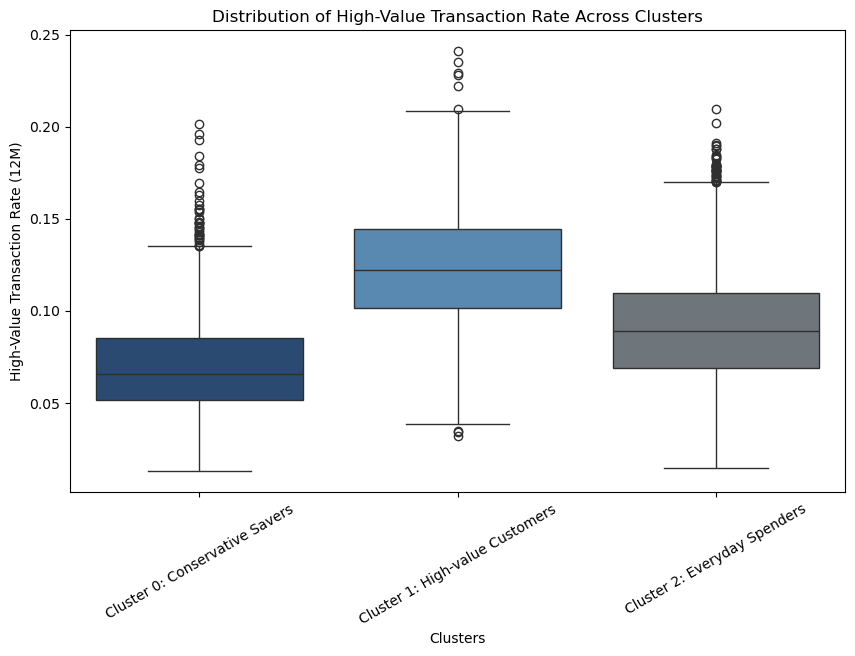

In [757]:
# Define custom color palette
custom_palette = ["#1F497D", "#4B8BBE", "#6C757D"]

# Define custom names for clusters
cluster_names = {
    0: 'Cluster 0: Conservative Savers',
    1: 'Cluster 1: High-value Customers',
    2: 'Cluster 2: Everyday Spenders'
}

# Map cluster numbers to names in the data
customer_data['cluster_name'] = customer_data['cluster'].map(cluster_names)

# Ensure correct order of clusters
cluster_order = ['Cluster 0: Conservative Savers', 'Cluster 1: High-value Customers', 'Cluster 2: Everyday Spenders']

# Create the boxplot with the correct order
plt.figure(figsize = (10, 6))
sns.boxplot(data = customer_data, x = 'cluster_name', y = 'high_value_transaction_rate_12m', palette = custom_palette, order = cluster_order)

# Labeling the axes and title
plt.xlabel('Clusters')
plt.ylabel('High-Value Transaction Rate (12M)')
plt.title('Distribution of High-Value Transaction Rate Across Clusters')

# Rotate x-ticks for better readability
plt.xticks(rotation = 30)

# Show the plot
plt.show()

We can see that cluster 1 has the greatest high-value transaction rate, followed by cluster 2 and then cluster 1 with the lowest high-value transaction rate. This means that for cluster 1, we can consider pushing for exlcusive premium services.

__Plot 5: Boxplot of online transaction ratio over the past 12 months across customer segments__

/var/folders/v1/4wqkj2hj45z1lw3v85kc4z5w0000gn/T/ipykernel_56050/1456272401.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = customer_data, x = 'cluster_name', y = 'online_transaction_ratio_12m', palette = custom_palette, order = cluster_order)


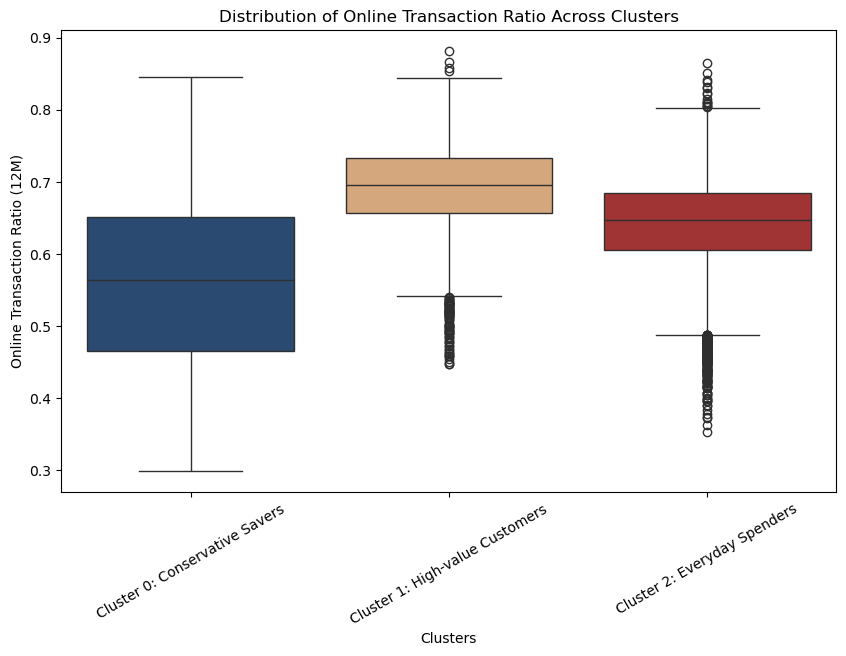

In [761]:
# Define custom color palette
custom_palette = ["#1F497D", "#E2A76F", "#B22222"]

# Define custom names for clusters
cluster_names = {
    0: 'Cluster 0: Conservative Savers',
    1: 'Cluster 1: High-value Customers',
    2: 'Cluster 2: Everyday Spenders'
}

# Map cluster numbers to names in the data
customer_data['cluster_name'] = customer_data['cluster'].map(cluster_names)

# Ensure correct order of clusters
cluster_order = ['Cluster 0: Conservative Savers', 'Cluster 1: High-value Customers', 'Cluster 2: Everyday Spenders']

# Create the boxplot with the correct order
plt.figure(figsize = (10, 6))
sns.boxplot(data = customer_data, x = 'cluster_name', y = 'online_transaction_ratio_12m', palette = custom_palette, order = cluster_order)

# Labeling the axes and title
plt.xlabel('Clusters')
plt.ylabel('Online Transaction Ratio (12M)')
plt.title('Distribution of Online Transaction Ratio Across Clusters')

# Rotate x-ticks for better readability
plt.xticks(rotation = 30)

# Show the plot
plt.show()

We can see that cluster 1 and 2 uses online transactions quite often, but cluster 0 still prefers traditional offline methods for transaction. 

__Plot 6: Bar graph for average transaction frequency over 12 months across customer segments__

/var/folders/v1/4wqkj2hj45z1lw3v85kc4z5w0000gn/T/ipykernel_56050/3374677679.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = customer_data, x = 'cluster_name', y = 'transaction_frequency_12m', palette = custom_palette, order = cluster_order)


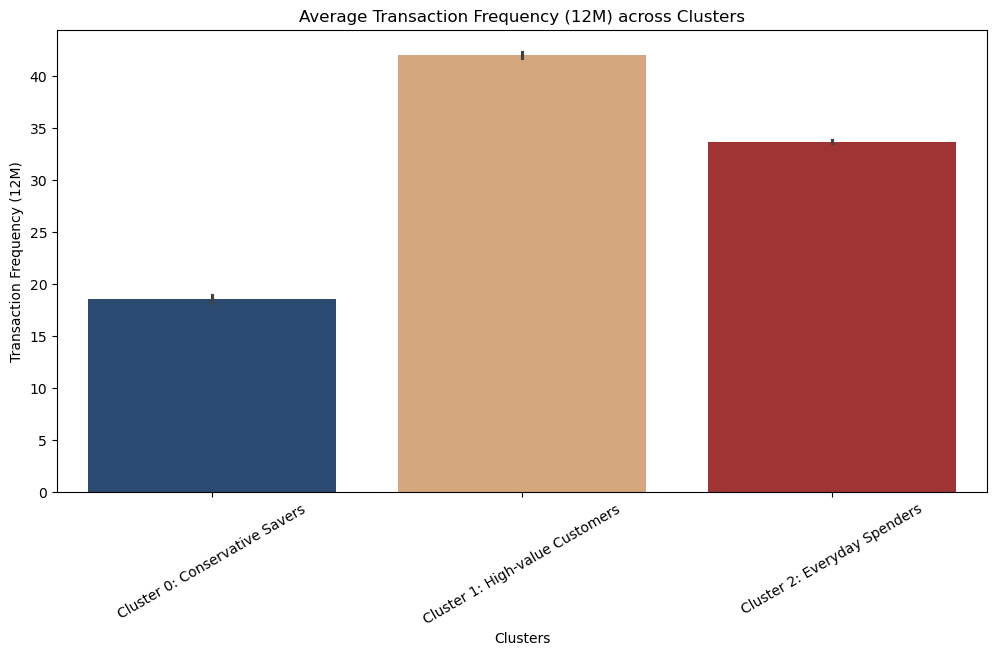

In [765]:
# Define custom names for clusters
cluster_names = {
    0: 'Cluster 0: Conservative Savers',
    1: 'Cluster 1: High-value Customers',
    2: 'Cluster 2: Everyday Spenders'
}

# Map cluster numbers to names in the data
customer_data['cluster_name'] = customer_data['cluster'].map(cluster_names)

# Ensure correct order of clusters
cluster_order = ['Cluster 0: Conservative Savers', 'Cluster 1: High-value Customers', 'Cluster 2: Everyday Spenders']

# Create the barplot with the custom color palette and cluster order
plt.figure(figsize = (12, 6))
sns.barplot(data = customer_data, x = 'cluster_name', y = 'transaction_frequency_12m', palette = custom_palette, order = cluster_order)

# Set the title and labels
plt.title('Average Transaction Frequency (12M) across Clusters')
plt.xlabel('Clusters')
plt.ylabel('Transaction Frequency (12M)')

# Rotate x-ticks for better readability
plt.xticks(rotation=30)

# Show the plot
plt.show()

We can see that cluster 1 has the highest average transaction frequency over the past year, followed by cluster 2 then cluster 0.

__Plot 7: Bar graph for total transaction amount over 12 months across customer segments__

/var/folders/v1/4wqkj2hj45z1lw3v85kc4z5w0000gn/T/ipykernel_56050/574111496.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_data, x='cluster_name', y='total_transaction_amount_12m', palette=custom_palette, order=cluster_order)


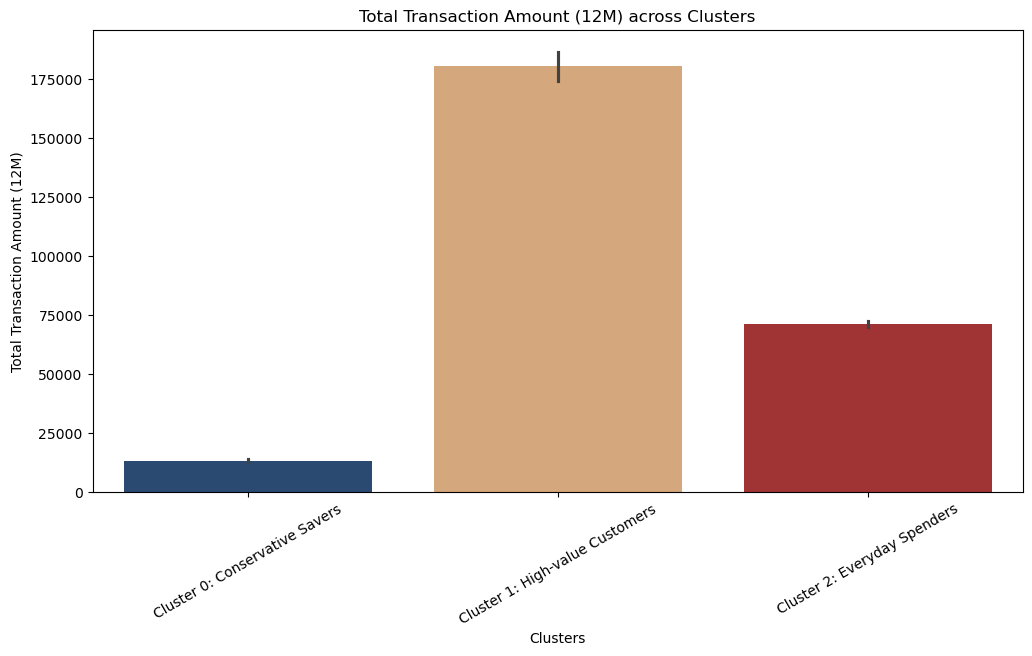

In [769]:
# Define custom color palette
custom_palette = ["#1F497D", "#E2A76F", "#B22222"]

# Define custom names for clusters
cluster_names = {
    0: 'Cluster 0: Conservative Savers',
    1: 'Cluster 1: High-value Customers',
    2: 'Cluster 2: Everyday Spenders'
}

# Map cluster numbers to names in the data
customer_data['cluster_name'] = customer_data['cluster'].map(cluster_names)

# Ensure correct order of clusters
cluster_order = ['Cluster 0: Conservative Savers', 'Cluster 1: High-value Customers', 'Cluster 2: Everyday Spenders']

# Create the barplot with the custom color palette and cluster order
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_data, x='cluster_name', y='total_transaction_amount_12m', palette=custom_palette, order=cluster_order)

# Set the title and labels
plt.title('Total Transaction Amount (12M) across Clusters')
plt.xlabel('Clusters')
plt.ylabel('Total Transaction Amount (12M)')

# Rotate x-ticks for better readability
plt.xticks(rotation=30)

# Show the plot
plt.show()

We can see that cluster 1 has the highest total transaction amount, followed by cluster 2 and lastly cluster 0. As cluster 1 has the highest total transaction amount, highest income level, highest average transaction frequency and highest product usage for most products, we concluded that cluster 1 are high-value customers. Since cluster 1 has the lowest transaction amount, income level, has the highest average age and mostly have savings account and personal loans, we concluded that cluster 0 are conservative savers. With cluster 2 being the largest customer base and the middle for most of the transaction history, we concluded that they are everyday spenders.

__Plot 8: Heatmap to check for correlation for each cluster__

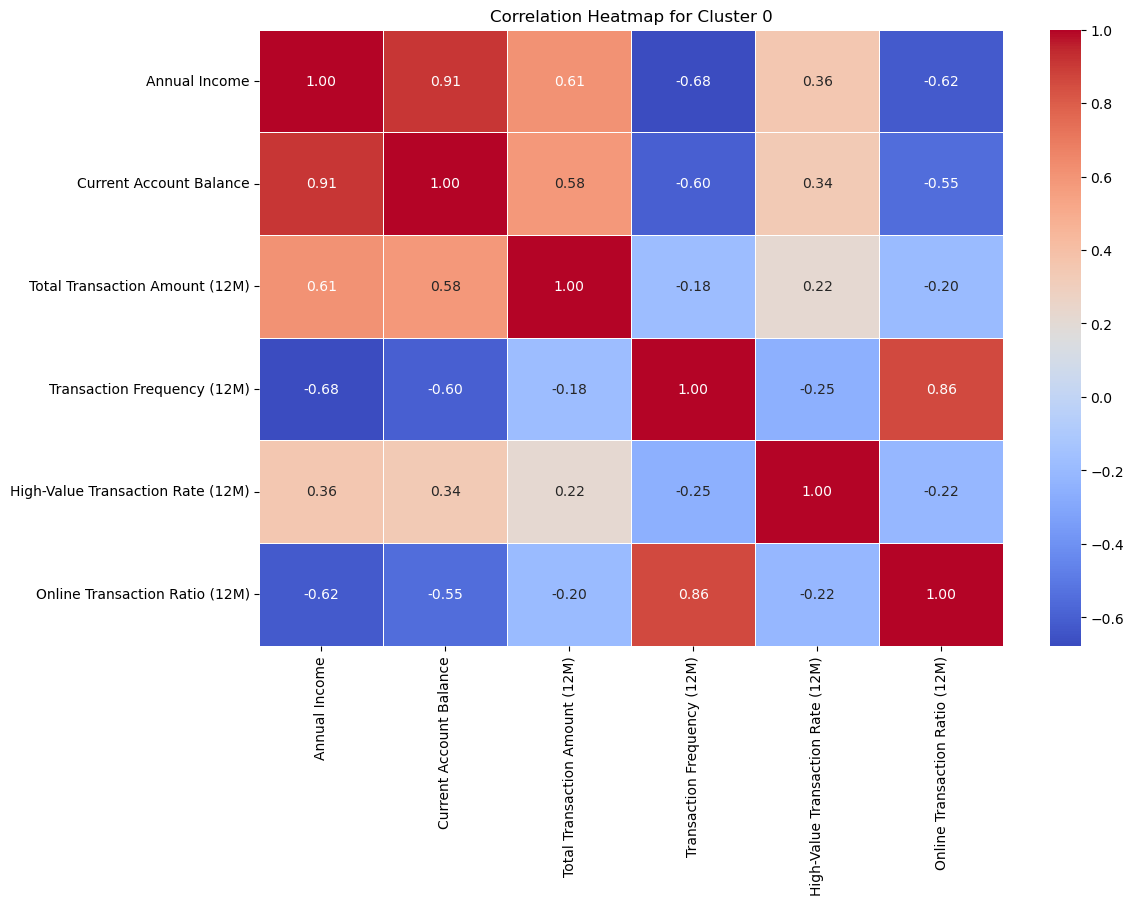

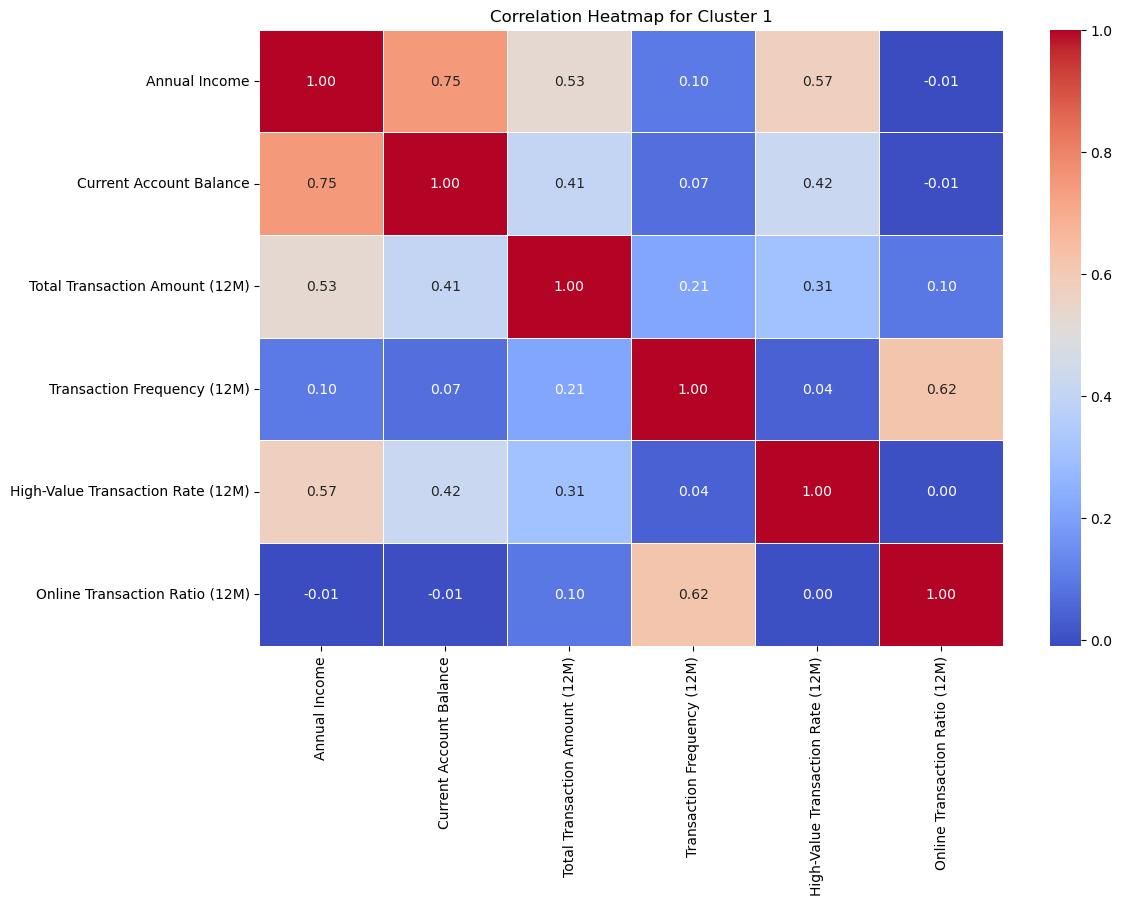

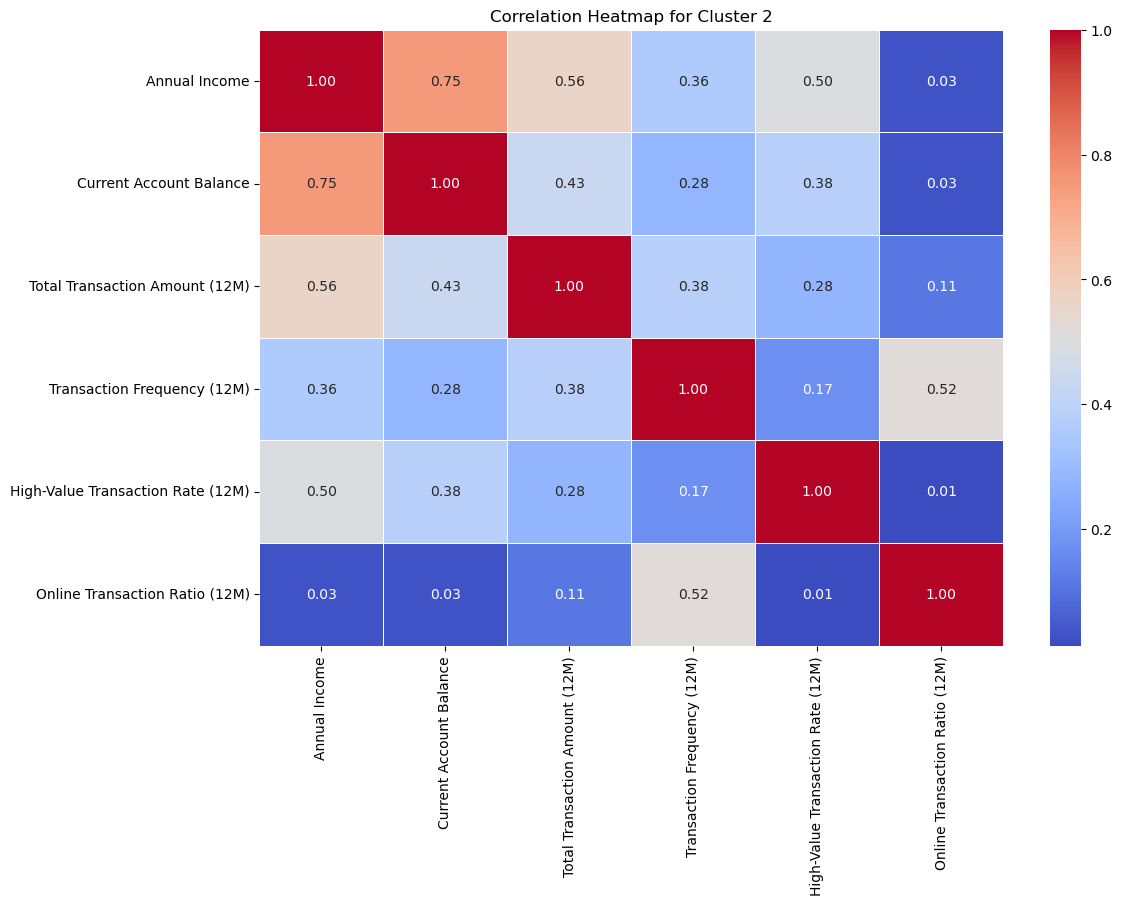

In [773]:
# Define the mapping of the original column names to more descriptive ones
column_name_mapping = {
    'income': 'Annual Income',
    'current_balance': 'Current Account Balance',
    'total_transaction_amount_12m': 'Total Transaction Amount (12M)',
    'transaction_frequency_12m': 'Transaction Frequency (12M)',
    'high_value_transaction_rate_12m': 'High-Value Transaction Rate (12M)',
    'online_transaction_ratio_12m': 'Online Transaction Ratio (12M)'
}

# Select relevant columns for correlation analysis
correlation_columns = ['income', 'current_balance', 'total_transaction_amount_12m',
                       'transaction_frequency_12m', 'high_value_transaction_rate_12m',
                       'online_transaction_ratio_12m']

# Sort clusters numerically before plotting
for cluster in sorted(customer_data['cluster'].unique()):
    # Filter data for the current cluster
    cluster_data = customer_data[customer_data['cluster'] == cluster]
    
    # Calculate the correlation matrix for the selected columns in the cluster
    correlation_matrix = cluster_data[correlation_columns].corr()
    
    # Rename the columns using the mapping
    correlation_matrix.rename(columns = column_name_mapping, index = column_name_mapping, inplace = True)
    
    # Plot the heatmap for the current cluster
    plt.figure(figsize = (12, 8))
    sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5, cbar = True)
    plt.title(f'Correlation Heatmap for Cluster {cluster}')
    plt.show()

__Plot 9: Bar graph for Mobile App and Web Account Usage across customer segments__

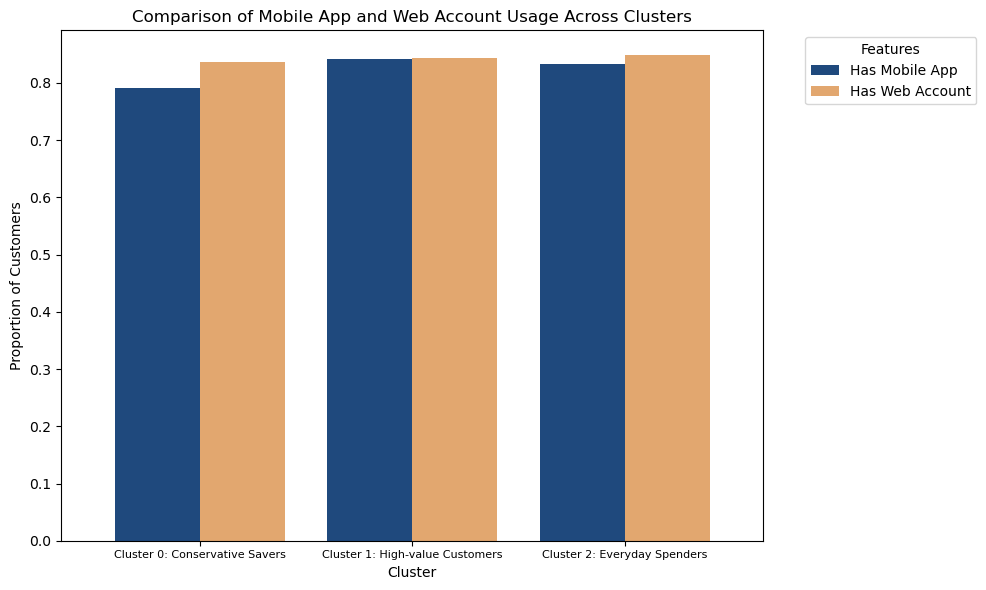

In [776]:
# Group by 'Cluster' and calculate the mean for each column
cluster_summary = customer_data.groupby('cluster')[['has_mobile_app', 'has_web_account']].mean().reset_index()

# Define custom names for clusters
cluster_names = {
    0: 'Cluster 0: Conservative Savers',
    1: 'Cluster 1: High-value Customers',
    2: 'Cluster 2: Everyday Spenders'
}

# Replace cluster numbers with custom names in the cluster_summary dataframe
cluster_summary['cluster'] = cluster_summary['cluster'].map(cluster_names)

# Plot the bar graph
cluster_summary.plot(x='cluster', kind='bar', figsize=(10, 6), color=["#1F497D", "#E2A76F"], width=0.8)

# Adjust the graph
plt.title('Comparison of Mobile App and Web Account Usage Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Proportion of Customers')

# Move legend outside the plot
plt.legend(title='Features', labels=['Has Mobile App', 'Has Web Account'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust x-axis labels
plt.xticks(rotation=0, fontsize = 8)  

# Adjust layout to prevent clipping
plt.tight_layout()

plt.show()

Only for cluster 0 can we see a noticeable difference between mobile app and web account usage, for cluster 1 and 2, customers use both mobile app and web accounts.

__Plot 10: Bar graph for Mobile and Web Logins per Week across customer segments__

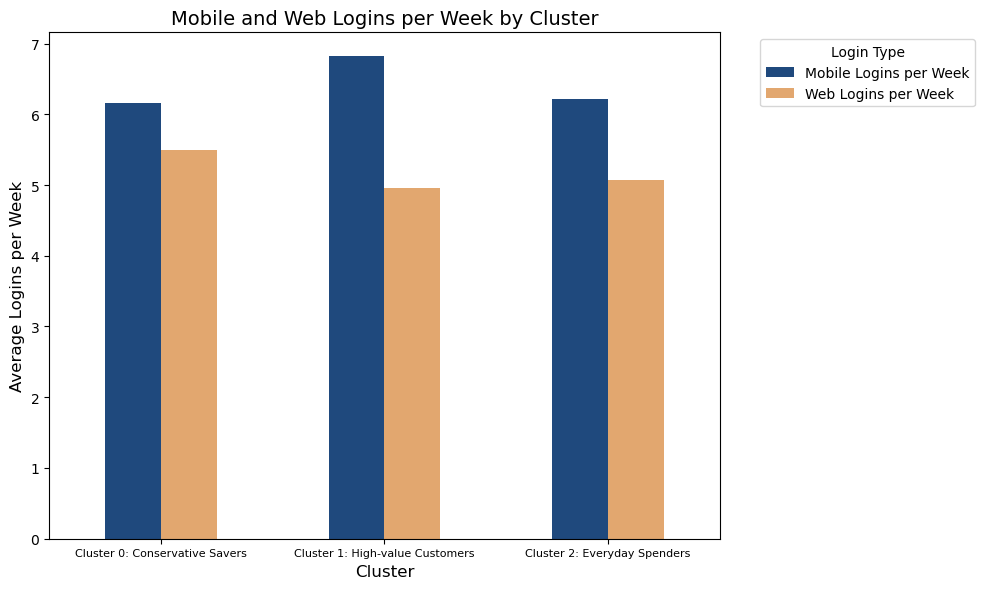

In [780]:
# Group by cluster and calculate the average mobile and web logins per week
cluster_logins = customer_data.groupby('cluster')[['mobile_logins_per_week', 'web_logins_per_week']].mean()

# Define custom names for clusters
cluster_names = {
    0: 'Cluster 0: Conservative Savers',
    1: 'Cluster 1: High-value Customers',
    2: 'Cluster 2: Everyday Spenders'
}

# Replace cluster numbers with custom names in the cluster_logins dataframe
cluster_logins.index = cluster_logins.index.map(cluster_names)

# Plot the bar graph
cluster_logins.plot(kind='bar', figsize=(10, 6), color=['#1F497D', '#E2A76F'])

# Customize the graph
plt.title('Mobile and Web Logins per Week by Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Logins per Week', fontsize=12)

# Adjust x-axis labels
plt.xticks(rotation=0, fontsize = 8)  

# Move legend outside the plot
plt.legend(title='Login Type', labels=['Mobile Logins per Week', 'Web Logins per Week'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Adjust layout to prevent clipping
plt.tight_layout()

plt.show()

We can see that for all 3 clusters, the average mobile logins per week is higher than average web logins per week. However, for cluster 0, the difference is negligible, for cluster 1, the difference is the greatest, followed by cluster 2.

__Plot 11: Bar graph for average web aand mobile session duration per segment__

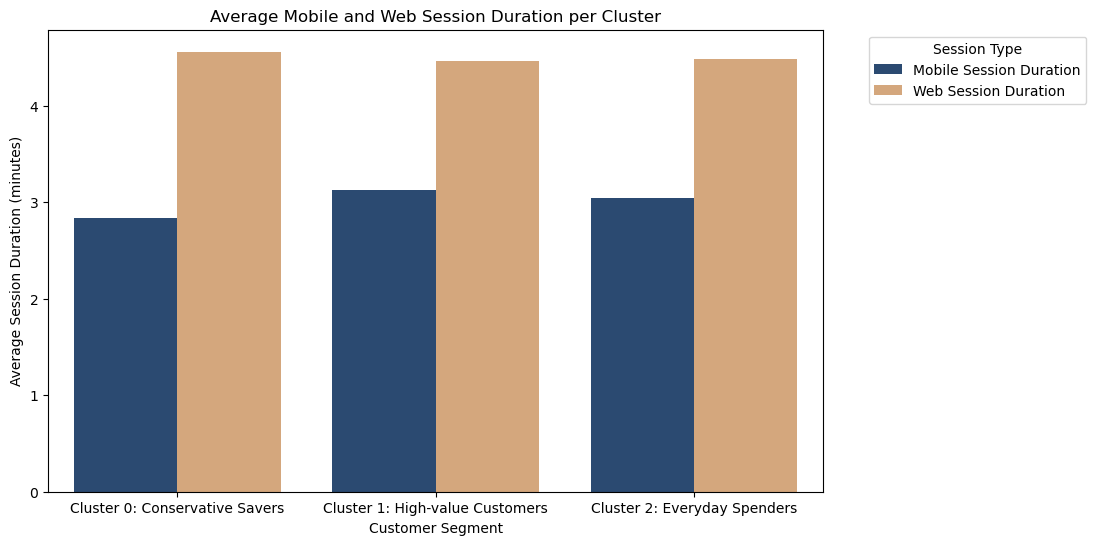

In [789]:
# Define custom names for clusters
cluster_names = {
    0: 'Cluster 0: Conservative Savers',
    1: 'Cluster 1: High-value Customers',
    2: 'Cluster 2: Everyday Spenders'
}

# Group by cluster and calculate the average session duration
session_duration = customer_data.groupby('cluster')[['avg_mobile_session_duration', 'avg_web_session_duration']].mean().reset_index()

# Rename columns for better readability
session_duration.rename(columns={'avg_mobile_session_duration': 'Mobile Session Duration',
                                 'avg_web_session_duration': 'Web Session Duration'}, inplace=True)

# Map cluster numbers to meaningful names
session_duration['cluster'] = session_duration['cluster'].map(cluster_names)

# Melt the DataFrame for easier plotting
session_duration_melted = session_duration.melt(id_vars='cluster', var_name='Session Type', value_name='Duration')

# Define custom palette
custom_palette = ["#1F497D", "#E2A76F"]

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=session_duration_melted, x='cluster', y='Duration', hue='Session Type', palette=custom_palette)

# Adjust labels and title
plt.xlabel('Customer Segment')
plt.ylabel('Average Session Duration (minutes)')
plt.title('Average Mobile and Web Session Duration per Cluster')

# Move the legend outside
plt.legend(title='Session Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

For all 3 clusters, the average web session durations is higher than the average mobile session duration. Out of the 3 clusters, cluster 1 has the highest average mobile web session duration.

__Plot 12: Bar graph of recency of Mobile and Web Logins by Customer Segment__

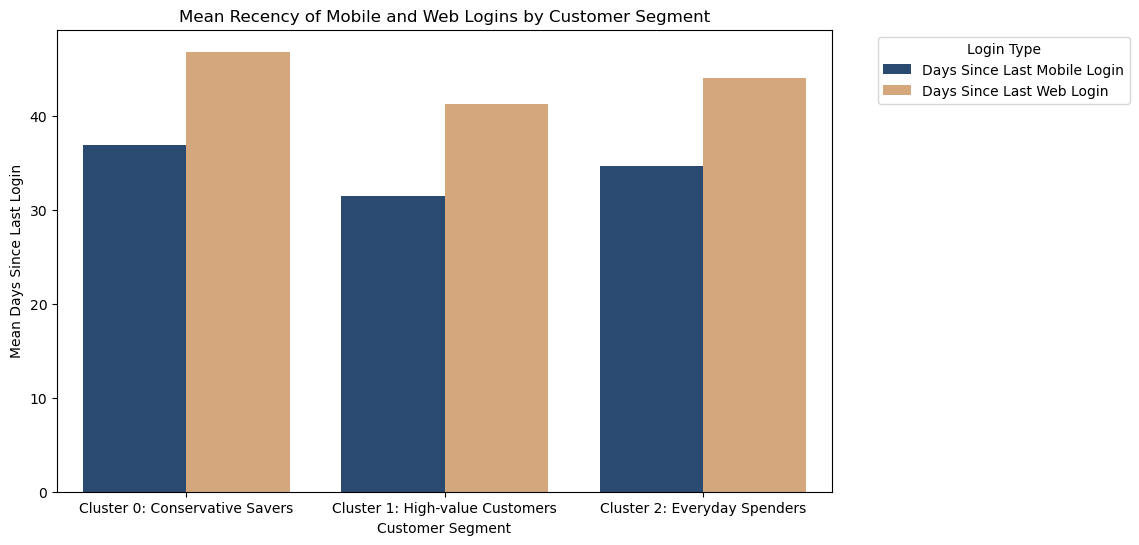

In [801]:
# Convert 'last_mobile_login' and 'last_web_login' to datetime and calculate days since last login
customer_data['days_since_last_mobile_login'] = (pd.to_datetime('today') - pd.to_datetime(customer_data['last_mobile_login'])).dt.days
customer_data['days_since_last_web_login'] = (pd.to_datetime('today') - pd.to_datetime(customer_data['last_web_login'])).dt.days

# Define custom names for clusters
cluster_names = {
    0: 'Cluster 0: Conservative Savers',
    1: 'Cluster 1: High-value Customers',
    2: 'Cluster 2: Everyday Spenders'
}

# Group by cluster and calculate the mean days since last login
login_recency = customer_data.groupby('cluster')[['days_since_last_mobile_login', 'days_since_last_web_login']].mean().reset_index()

# Map cluster numbers to meaningful names
login_recency['cluster'] = login_recency['cluster'].map(cluster_names)

# Rename columns for better readability
login_recency.rename(columns={'days_since_last_mobile_login': 'Days Since Last Mobile Login',
                              'days_since_last_web_login': 'Days Since Last Web Login'}, inplace=True)

# Melt the DataFrame for easier plotting
login_recency_melted = login_recency.melt(id_vars='cluster', var_name='Login Type', value_name='Days Since Last Login')

# Define custom palette
custom_palette = ["#1F497D", "#E2A76F"]

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=login_recency_melted, x='cluster', y='Days Since Last Login', hue='Login Type', palette=custom_palette)

# Adjust labels and title
plt.xlabel('Customer Segment')
plt.ylabel('Mean Days Since Last Login')
plt.title('Mean Recency of Mobile and Web Logins by Customer Segment')

# Move the legend outside
plt.legend(title='Login Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

From this, we can see that for cluster 0, both the average days since the last mobile and web login are the highest among all. For cluster 1, the average days since the last mobile and web logins are the lowest. 